In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
import pandas as pd
data = pd.read_csv('onlinefoods.csv', delimiter=',', encoding="ISO-8859-1")
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


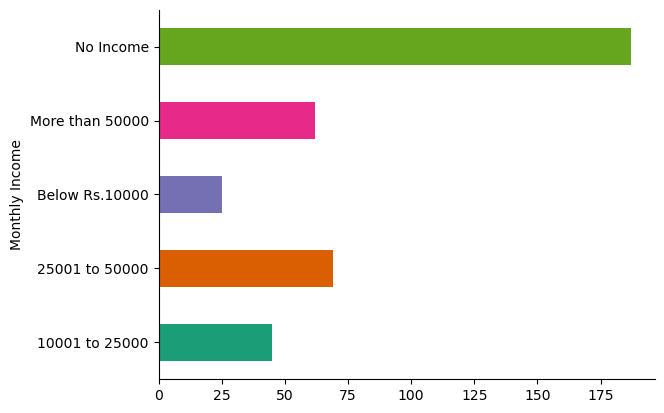

In [9]:
# @title Monthly Income

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Monthly Income').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

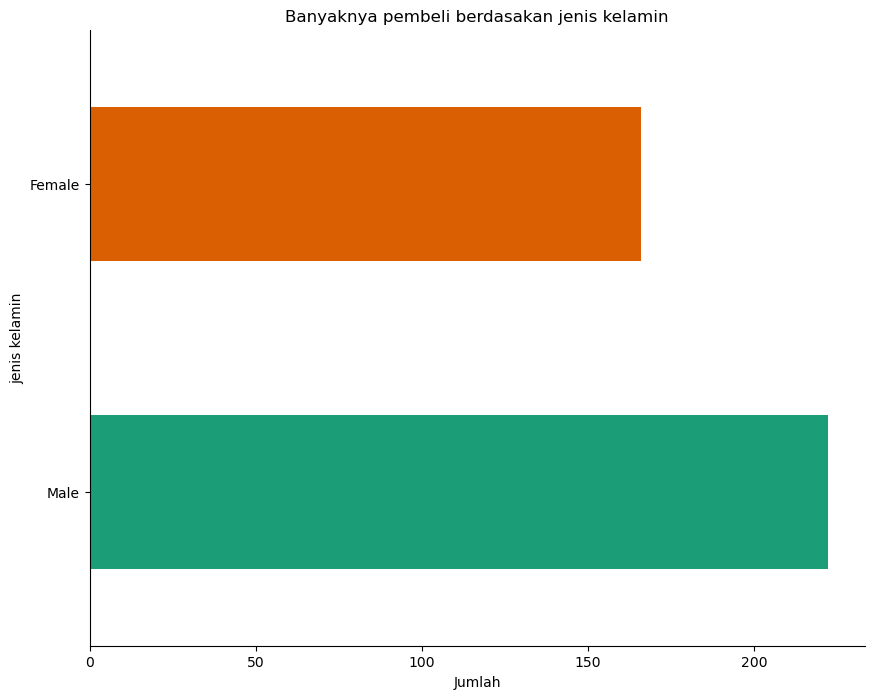

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Misalkan 'data' adalah DataFrame Anda
# Kelompokkan data berdasarkan 'Brand_Name' dan hitung ukuran masing-masing grup
Gender_counts = data.groupby('Gender').size().sort_values(ascending=False)

# Plot hasil
plt.figure(figsize=(10, 8))
Gender_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(Gender_counts)))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Jumlah')
plt.ylabel('jenis kelamin')
plt.title('Banyaknya pembeli berdasakan jenis kelamin')
plt.show()

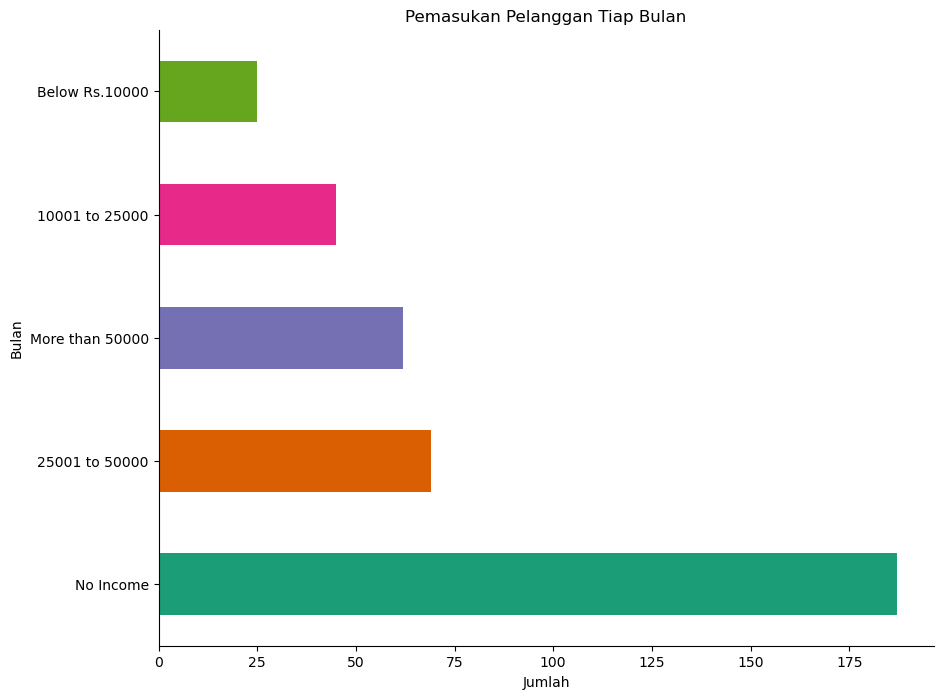

In [11]:
# Misalkan 'data' adalah DataFrame Anda
# Kelompokkan data berdasarkan 'Brand_Name' dan hitung ukuran masing-masing grup
Income_counts = data.groupby('Monthly Income').size().sort_values(ascending=False)

# Plot hasil
plt.figure(figsize=(10, 8))
Income_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(Income_counts)))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Jumlah')
plt.ylabel('Bulan')
plt.title('Pemasukan Pelanggan Tiap Bulan')
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
# Load the dataset
data = pd.read_csv('/content/sample_data/onlinefoods.csv')
# Strip any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 12'])
# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications']
numerical_cols = ['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude', 'Pin code']

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/onlinefoods.csv'

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [ ]:
# Separate features and target variable
X = data.drop(['Output'], axis=1)
y = data['Output']

# Encoding categorical variables
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
                        'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

print(X_processed.shape)

(388, 26)


In [ ]:
# Separate features and target variable
X = data.drop(['Output'], axis=1)
y = data['Output']

# Convert target variable to numerical (assuming 'Yes' maps to 1 and other values to 0)
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

# Encoding categorical variables
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features) # OneHotEncoder to handle categorical features
    ])

# Preprocess the data
X_processed = preprocessor.fit_transform(X) # Transform the data using the preprocessor

# Split data into train and test sets after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(X_processed.shape)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5) # Use preprocessed data for training
    print(f"{name} CV Mean Accuracy: {cv_scores.mean()}")

    # Train the model
    model.fit(X_train, y_train) # Use preprocessed data for training

    # Predict on test set
    y_pred = model.predict(X_test) # Use preprocessed data for testing

    # Evaluate the model
    print(f"Model: {name}")
    # Use appropriate metrics for regression tasks
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")
    print("\n")

(388, 26)
Logistic Regression CV Mean Accuracy: 0.8741935483870968
Model: Logistic Regression
Mean Squared Error: 0.1282051282051282
R-squared: 0.015151515151514805


Random Forest CV Mean Accuracy: 0.9064516129032258
Model: Random Forest
Mean Squared Error: 0.10256410256410256
R-squared: 0.21212121212121182


SVM CV Mean Accuracy: 0.8741935483870968
Model: SVM
Mean Squared Error: 0.1282051282051282
R-squared: 0.015151515151514805




In [ ]:
# Separate features and target variable
X = data.drop(['Output'], axis=1)
y = data['Output']

# Encoding categorical variables
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
                        'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features) # OneHotEncoder to handle categorical features
    ])

# Preprocess the data
X_processed = preprocessor.fit_transform(X) # Transform the data using the preprocessor

# Split data into train and test sets after preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(X_processed.shape)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Import necessary metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train and evaluate models
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5) # Use preprocessed data for training
    print(f"{name} CV Mean Accuracy: {cv_scores.mean()}")

    # Train the model
    model.fit(X_train, y_train) # Use preprocessed data for training

    # Predict on test set
    y_pred = model.predict(X_test) # Use preprocessed data for testing

    # Evaluate the model
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")
    print(classification_report(y_test, y_pred))
    print("\n")

(388, 26)
Logistic Regression CV Mean Accuracy: 0.8741935483870968
Model: Logistic Regression
Accuracy: 0.8717948717948718
Precision: 0.8638009049773755
Recall: 0.8717948717948718
F1-Score: 0.866924120655464
              precision    recall  f1-score   support

          No       0.60      0.50      0.55        12
         Yes       0.91      0.94      0.93        66

    accuracy                           0.87        78
   macro avg       0.76      0.72      0.74        78
weighted avg       0.86      0.87      0.87        78



Random Forest CV Mean Accuracy: 0.9064516129032258
Model: Random Forest
Accuracy: 0.8974358974358975
Precision: 0.8916289592760182
Recall: 0.8974358974358975
F1-Score: 0.8935392965243713
              precision    recall  f1-score   support

          No       0.70      0.58      0.64        12
         Yes       0.93      0.95      0.94        66

    accuracy                           0.90        78
   macro avg       0.81      0.77      0.79        78
weig

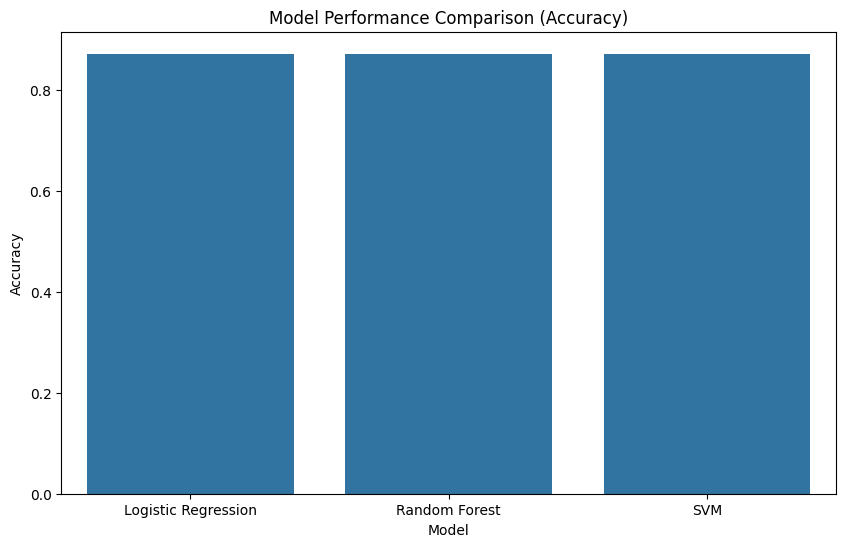

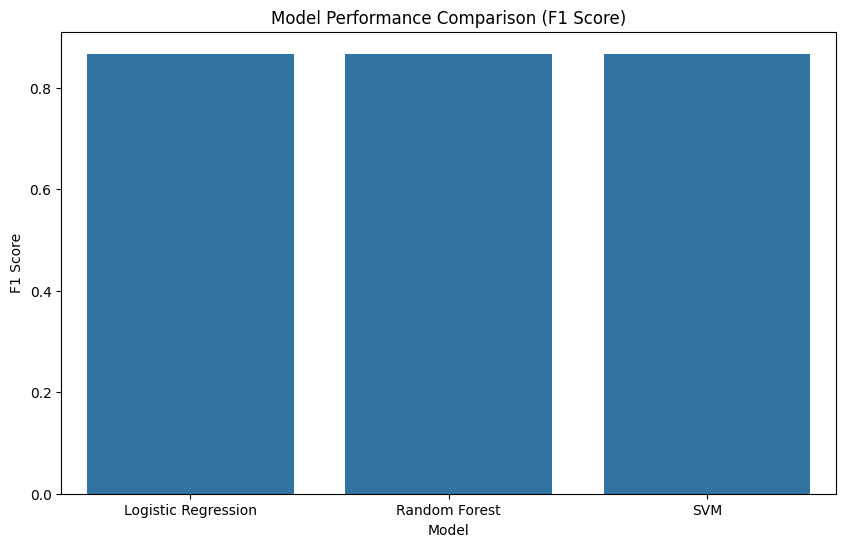

In [ ]:
# ... (previous code)

# Initialize a dictionary to store results
results = {'Model': [], 'Accuracy': [], 'F1 Score': []}

# Train and evaluate models
for name, model in models.items():
    # ... (model training and evaluation)

    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Create DataFrame from results
df_results = pd.DataFrame(results)

# Visualization of model performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_results) # Use the results DataFrame
plt.title('Model Performance Comparison (Accuracy)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=df_results) # Use the results DataFrame
plt.title('Model Performance Comparison (F1 Score)')
plt.show()